In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('thyroid0387-attr-clean.csv')

In [3]:
with pd.option_context('display.max_columns', 40):
    print(df.describe(include='all'))

                 age   sex on thyroxine query on thyroxine  \
count    9172.000000  9172         9172               9172   
unique           NaN     3            2                  2   
top              NaN     F            f                  f   
freq             NaN  6073         7932               9019   
mean       73.555822   NaN          NaN                NaN   
std      1183.976718   NaN          NaN                NaN   
min         1.000000   NaN          NaN                NaN   
25%        37.000000   NaN          NaN                NaN   
50%        55.000000   NaN          NaN                NaN   
75%        68.000000   NaN          NaN                NaN   
max     65526.000000   NaN          NaN                NaN   

       on antithyroid medication  sick pregnant thyroid surgery  \
count                       9172  9172     9172            9172   
unique                         2     2        2               2   
top                            f     f        f       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [5]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(df[i].value_counts())
    print('************************************')

sex
F    6073
M    2792
?     307
Name: count, dtype: int64
************************************
on thyroxine
f    7932
t    1240
Name: count, dtype: int64
************************************
query on thyroxine
f    9019
t     153
Name: count, dtype: int64
************************************
on antithyroid medication
f    9056
t     116
Name: count, dtype: int64
************************************
sick
f    8828
t     344
Name: count, dtype: int64
************************************
pregnant
f    9065
t     107
Name: count, dtype: int64
************************************
thyroid surgery
f    9038
t     134
Name: count, dtype: int64
************************************
I131 treatment
f    9003
t     169
Name: count, dtype: int64
************************************
query hypothyroid
f    8542
t     630
Name: count, dtype: int64
************************************
query hyperthyroid
f    8521
t     651
Name: count, dtype: int64
************************************
lithium
f    907

In [6]:
df=df.replace({"t": 1, "f": 0})

In [7]:
df=df.replace({'?': np.nan})

In [8]:
df=df.replace({"M": 1, "F": 0})

In [9]:
# not relavent for medical diagnosis
del df['referral source']

In [10]:
# not relevant if measured
del df['TSH measured']

In [11]:
del df['T3 measured']

In [12]:
del df['TT4 measured']

In [13]:
del df['T4U measured']

In [14]:
del df['FTI measured']

In [15]:
del df['TBG measured']

In [16]:
# too many missing values
del df['TBG']

In [17]:
# remove all rows with missing values
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5789 entries, 19 to 9141
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        5789 non-null   int64  
 1   sex                        5789 non-null   float64
 2   on thyroxine               5789 non-null   int64  
 3   query on thyroxine         5789 non-null   int64  
 4   on antithyroid medication  5789 non-null   int64  
 5   sick                       5789 non-null   int64  
 6   pregnant                   5789 non-null   int64  
 7   thyroid surgery            5789 non-null   int64  
 8   I131 treatment             5789 non-null   int64  
 9   query hypothyroid          5789 non-null   int64  
 10  query hyperthyroid         5789 non-null   int64  
 11  lithium                    5789 non-null   int64  
 12  goitre                     5789 non-null   int64  
 13  tumor                      5789 non-null   int64  
 

In [19]:
with pd.option_context('display.max_columns', 40):
    print(df.describe(include='all'))

                 age          sex  on thyroxine  query on thyroxine  \
count    5789.000000  5789.000000   5789.000000         5789.000000   
unique           NaN          NaN           NaN                 NaN   
top              NaN          NaN           NaN                 NaN   
freq             NaN          NaN           NaN                 NaN   
mean       76.291242     0.333391      0.121264            0.010364   
std      1216.726999     0.471466      0.326463            0.101286   
min         1.000000     0.000000      0.000000            0.000000   
25%        38.000000     0.000000      0.000000            0.000000   
50%        56.000000     0.000000      0.000000            0.000000   
75%        69.000000     1.000000      0.000000            0.000000   
max     65512.000000     1.000000      1.000000            1.000000   

        on antithyroid medication         sick     pregnant  thyroid surgery  \
count                 5789.000000  5789.000000  5789.000000      57

In [20]:
# hyperthyroid conditions:
# 	A	hyperthyroid
# 	B	T3 toxic
# 	C	toxic goitre
# 	D	secondary toxic

# hypothyroid conditions:
# 	E	hypothyroid
# 	F	primary hypothyroid
# 	G	compensated hypothyroid
# 	H	secondary hypothyroid

hyper_cond = ['A', 'B', 'C', 'D']
hypo_cond = ['E', 'F', 'G', 'H']
healthy_cond = ['-']

for idx, row in df.iterrows():
    cond = row['diagnosis']
    if cond in hyper_cond:
       df.loc[idx, 'diagnosis'] = 2
    elif cond in hypo_cond:
        df.loc[idx, 'diagnosis'] = 1
    elif cond in healthy_cond:
        df.loc[idx, 'diagnosis'] = 0
    else:
        df = df.drop(idx)

In [21]:
for i in df.columns:
    print(df[i].value_counts())
    print('************************************')

age
70       106
60       103
55       101
72       100
59        98
        ... 
455        1
94         1
65511      1
65512      1
2          1
Name: count, Length: 93, dtype: int64
************************************
sex
0.0    2932
1.0    1563
Name: count, dtype: int64
************************************
on thyroxine
0    4033
1     462
Name: count, dtype: int64
************************************
query on thyroxine
0    4452
1      43
Name: count, dtype: int64
************************************
on antithyroid medication
0    4421
1      74
Name: count, dtype: int64
************************************
sick
0    4319
1     176
Name: count, dtype: int64
************************************
pregnant
0    4472
1      23
Name: count, dtype: int64
************************************
thyroid surgery
0    4433
1      62
Name: count, dtype: int64
************************************
I131 treatment
0    4406
1      89
Name: count, dtype: int64
************************************
que

In [22]:
df.count()

age                          4495
sex                          4495
on thyroxine                 4495
query on thyroxine           4495
on antithyroid medication    4495
sick                         4495
pregnant                     4495
thyroid surgery              4495
I131 treatment               4495
query hypothyroid            4495
query hyperthyroid           4495
lithium                      4495
goitre                       4495
tumor                        4495
hypopituitary                4495
psych                        4495
TSH                          4495
T3                           4495
TT4                          4495
T4U                          4495
FTI                          4495
diagnosis                    4495
dtype: int64

In [23]:
df.duplicated().any()

True

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.count()

age                          4493
sex                          4493
on thyroxine                 4493
query on thyroxine           4493
on antithyroid medication    4493
sick                         4493
pregnant                     4493
thyroid surgery              4493
I131 treatment               4493
query hypothyroid            4493
query hyperthyroid           4493
lithium                      4493
goitre                       4493
tumor                        4493
hypopituitary                4493
psych                        4493
TSH                          4493
T3                           4493
TT4                          4493
T4U                          4493
FTI                          4493
diagnosis                    4493
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4493 entries, 19 to 9141
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4493 non-null   int64  
 1   sex                        4493 non-null   float64
 2   on thyroxine               4493 non-null   int64  
 3   query on thyroxine         4493 non-null   int64  
 4   on antithyroid medication  4493 non-null   int64  
 5   sick                       4493 non-null   int64  
 6   pregnant                   4493 non-null   int64  
 7   thyroid surgery            4493 non-null   int64  
 8   I131 treatment             4493 non-null   int64  
 9   query hypothyroid          4493 non-null   int64  
 10  query hyperthyroid         4493 non-null   int64  
 11  lithium                    4493 non-null   int64  
 12  goitre                     4493 non-null   int64  
 13  tumor                      4493 non-null   int64  
 

In [27]:
for i in df.columns:
    print(df[i].value_counts())
    print('************************************')

age
70       106
60       102
55       101
72       100
59        98
        ... 
455        1
94         1
65511      1
65512      1
2          1
Name: count, Length: 93, dtype: int64
************************************
sex
0.0    2930
1.0    1563
Name: count, dtype: int64
************************************
on thyroxine
0    4032
1     461
Name: count, dtype: int64
************************************
query on thyroxine
0    4450
1      43
Name: count, dtype: int64
************************************
on antithyroid medication
0    4419
1      74
Name: count, dtype: int64
************************************
sick
0    4317
1     176
Name: count, dtype: int64
************************************
pregnant
0    4470
1      23
Name: count, dtype: int64
************************************
thyroid surgery
0    4431
1      62
Name: count, dtype: int64
************************************
I131 treatment
0    4404
1      89
Name: count, dtype: int64
************************************
que

In [28]:
# only negative values does not add any information
del df['hypopituitary']

In [29]:
df['TSH'] = pd.to_numeric(df['TSH'])
df['T3'] = pd.to_numeric(df['T3'])
df['TT4'] = pd.to_numeric(df['TT4'])
df['T4U'] = pd.to_numeric(df['T4U'])
df['FTI'] = pd.to_numeric(df['FTI'])
df['diagnosis'] = pd.to_numeric(df['diagnosis'])

In [30]:
col_to_remove = []
for idx, col in df.iterrows():
    val = col['age']
    if  val < 1 or val > 120:
        col_to_remove.append(idx)
print(col_to_remove)
df.drop(col_to_remove, inplace=True)

[2976, 5710, 6392]


In [31]:
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].describe()

,age,TSH,T3,TT4,T4U,FTI
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000
mean,53.102004,2.128017,2.036846,107.969265,0.973186,112.144655
std,18.395916,4.136879,0.761738,30.460386,0.160434,31.584524
min,1.000000,0.005000,0.100000,4.000000,0.250000,3.500000
25%,38.000000,0.420000,1.600000,90.000000,0.870000,95.000000
50%,56.000000,1.300000,2.000000,104.000000,0.970000,108.000000
75%,68.000000,2.300000,2.300000,122.000000,1.060000,125.000000
max,97.000000,98.000000,18.000000,430.000000,2.120000,642.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4490 entries, 19 to 9141
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4490 non-null   int64  
 1   sex                        4490 non-null   float64
 2   on thyroxine               4490 non-null   int64  
 3   query on thyroxine         4490 non-null   int64  
 4   on antithyroid medication  4490 non-null   int64  
 5   sick                       4490 non-null   int64  
 6   pregnant                   4490 non-null   int64  
 7   thyroid surgery            4490 non-null   int64  
 8   I131 treatment             4490 non-null   int64  
 9   query hypothyroid          4490 non-null   int64  
 10  query hyperthyroid         4490 non-null   int64  
 11  lithium                    4490 non-null   int64  
 12  goitre                     4490 non-null   int64  
 13  tumor                      4490 non-null   int64  
 

In [33]:
col = list(df.columns)

categorical_features = [ 'sex',
                         'on thyroxine',
                         'query on thyroxine',
                         'on antithyroid medication',
                         'sick',
                         'pregnant',
                         'thyroid surgery',
                         'I131 treatment',
                         'query hypothyroid',
                         'query hyperthyroid',
                         'lithium',
                         'goitre',
                         'tumor',
                         'psych']

for cf in categorical_features:
    col.remove(cf)

numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : sex on thyroxine query on thyroxine on antithyroid medication sick pregnant thyroid surgery I131 treatment query hypothyroid query hyperthyroid lithium goitre tumor psych
Numerical Features : age TSH T3 TT4 T4U FTI diagnosis


In [34]:
for cf in categorical_features:
    df[cf] = df[cf].astype(int)

In [214]:
a = list(df.columns)
a.remove('diagnosis')
df_n = df[a]

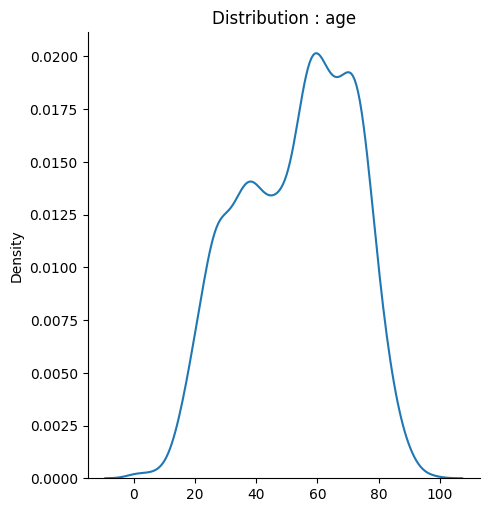

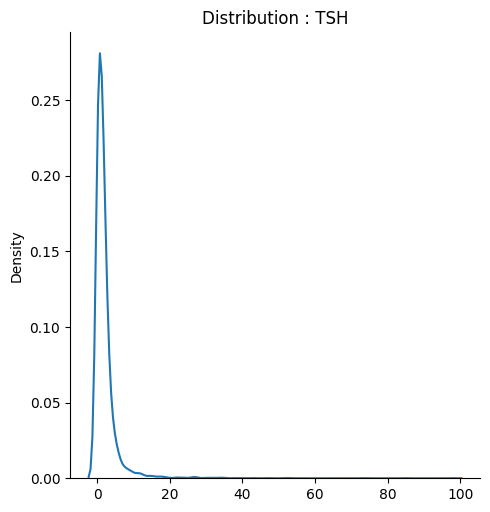

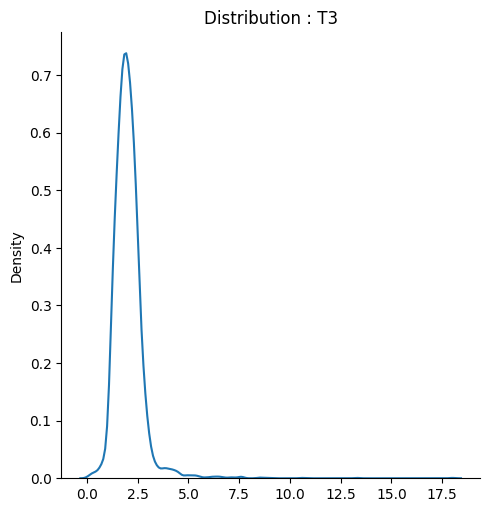

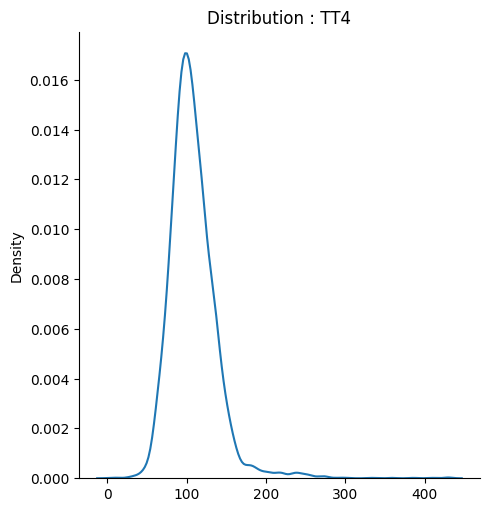

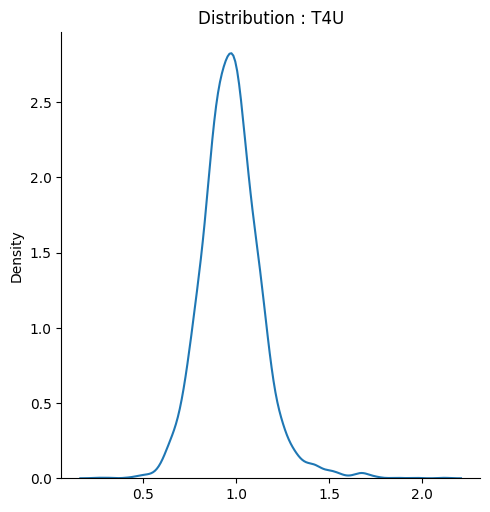

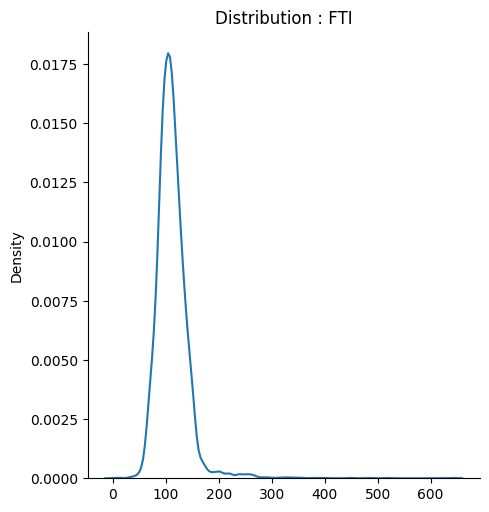

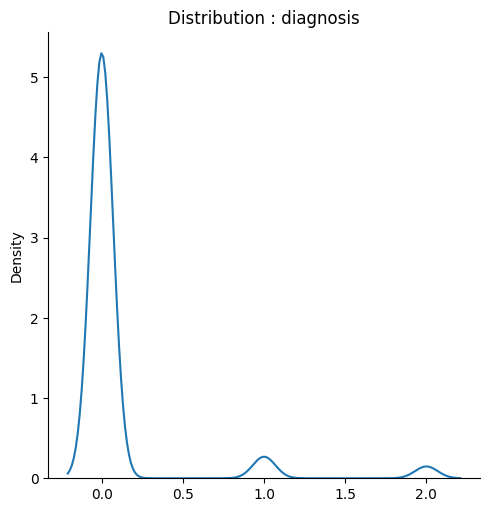

In [36]:
# fig, ax = plt.subplots(nrows = 10,ncols = 10,figsize = (15,15))
for i in range(len(numerical_features)):
    # plt.subplot(3,3,i+1)
    sns.displot(df[numerical_features[i]].to_numpy(), kind='kde')
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.decomposition import PCA

In [40]:
from sklearn.utils import shuffle

In [48]:
from sklearn.neighbors import NearestNeighbors

In [56]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

In [62]:
from sklearn.metrics import classification_report

In [233]:
df_new = df.groupby('diagnosis').sample(n=116, random_state=2) 

In [42]:
#df_new = shuffle(df_new)

In [43]:
#df_new

In [44]:
# features_list = df.columns.to_list()
# features_list.remove('diagnosis')

# X = df[features_list].values
# y = df['diagnosis'].values

In [220]:
pca = PCA(2)

In [234]:
df_pca = pca.fit_transform(df_new)

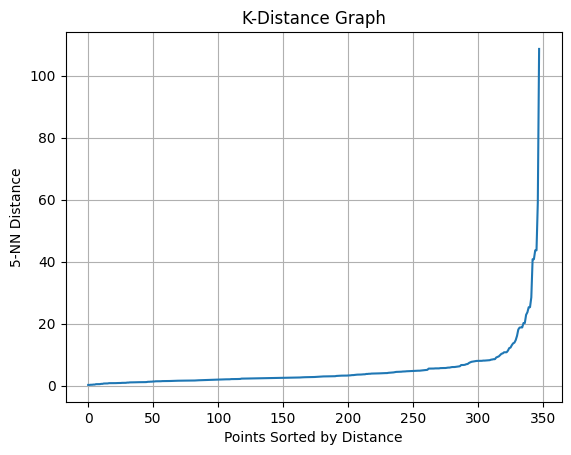

In [235]:


knn = NearestNeighbors(n_neighbors = 5)
model = knn.fit(df_pca)
distances, indices = knn.kneighbors(df_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph');



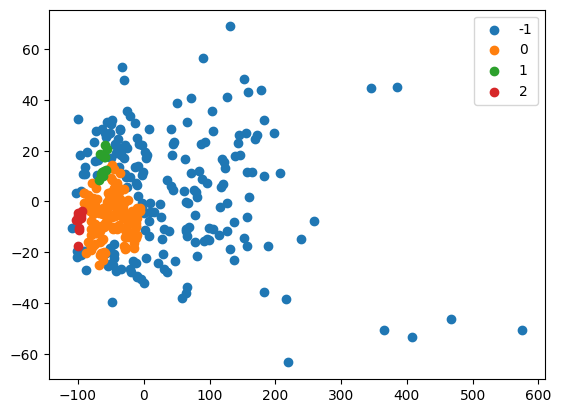

In [251]:
label = DBSCAN(eps=7, min_samples=9).fit_predict(df_pca)
#Getting unique labels
u_label = np.unique(label)
 
#plotting the results:
for i in u_label:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [240]:
homogeneity_score(df_new['diagnosis'], label)

0.0

In [241]:
completeness_score(df_new['diagnosis'], label)

1.0

In [252]:
target_names = ['healthy', 'hyper_cond', 'hypo_cond']
res1 = classification_report(df_new['diagnosis'], label, labels=[ 0, 1, 2], target_names=target_names, output_dict=True)
pd.DataFrame(res1)

,healthy,hyper_cond,hypo_cond,micro avg,macro avg,weighted avg
precision,0.470149,0.666667,0.090909,0.458599,0.409242,0.409242
recall,0.543103,0.068966,0.008621,0.206897,0.206897,0.206897
f1-score,0.504000,0.125000,0.015748,0.285149,0.214916,0.214916
support,116.000000,116.000000,116.000000,348.000000,348.000000,348.000000


In [228]:
import numpy as np

In [244]:
def dbscan_grid_search(X_data, eps_space = 0.5,
                       min_samples_space = 5, min_clust = 3, max_clust = 4):

    """
Performs a hyperparameter grid search for DBSCAN.

Parameters:
    * X_data            = data used to fit the DBSCAN instance
    * lst               = a list to store the results of the grid search
    * clst_count        = a list to store the number of non-whitespace clusters
    * eps_space         = the range values for the eps parameter
    * min_samples_space = the range values for the min_samples parameter
    * min_clust         = the minimum number of clusters required after each search iteration in order for a result to be appended to the lst
    * max_clust         = the maximum number of clusters required after each search iteration in order for a result to be appended to the lst


Example:

# Loading Libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading iris dataset
iris = datasets.load_iris()
X = iris.data[:, :] 
y = iris.target

# Scaling X data
dbscan_scaler = StandardScaler()

dbscan_scaler.fit(X)

dbscan_X_scaled = dbscan_scaler.transform(X)

# Setting empty lists in global environment
dbscan_clusters = []
cluster_count   = []


# Inputting function parameters
dbscan_grid_search(X_data = dbscan_X_scaled,
                   lst = dbscan_clusters,
                   clst_count = cluster_count
                   eps_space = pd.np.arange(0.1, 5, 0.1),
                   min_samples_space = pd.np.arange(1, 50, 1),
                   min_clust = 3,
                   max_clust = 6)

"""

    # Importing counter to count the amount of data in each cluster
    from collections import Counter
    from copy import deepcopy
    res_list = []
    homogeneity_score_max = (0,0)
    completeness_score_max = (0,0)
    clasification_max = (0,0)
    
    
    # Starting a tally of total iterations
    n_iterations = 0


    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:
            dbscan_grid = DBSCAN(eps = eps_val,
                                 min_samples = samples_val)

            # fit_transform
            clusters = dbscan_grid.fit_predict(X = X_data)
            # Counting the amount of data in each cluster
            cluster_count = Counter(clusters)
            # Saving the number of clusters
            n_clusters = sum(abs(np.unique(clusters))) - 1
            # Increasing the iteration tally with each run of the loop
            n_iterations += 1
            # Appending the lst each time n_clusters criteria is reached
            if n_clusters >= min_clust and n_clusters <= max_clust:
                dbscan_res = {}
                dbscan_res['dbscan_clusters'] = [eps_val, samples_val, n_clusters]
                dbscan_res['cluster_count'] = cluster_count
                dbscan_res['homogeneity_score'] = homogeneity_score(df_new['diagnosis'], clusters)
                dbscan_res['completeness_score'] = completeness_score(df_new['diagnosis'], clusters)
                target_names = ['healthy', 'hyper_cond', 'hypo_cond']
                dbscan_res['classification_report'] = classification_report(df_new['diagnosis'], clusters, labels=[ 0, 1, 2], target_names=target_names, output_dict=True)
                res_list.append(deepcopy(dbscan_res))


                if homogeneity_score_max[0] <  dbscan_res['homogeneity_score']:
                    homogeneity_score_max = (dbscan_res['homogeneity_score'], (eps_val, samples_val, n_clusters))
                    
                if completeness_score_max[0] < dbscan_res['completeness_score']:
                     completeness_score_max = (dbscan_res['completeness_score'], (eps_val, samples_val, n_clusters))
                    
                if clasification_max[0] < dbscan_res['classification_report']['macro avg']['precision']:
                    clasification_max = (dbscan_res['classification_report']['macro avg']['precision'], (eps_val, samples_val, n_clusters))
                dbscan_res.clear()

                

    # Printing grid search summary information
    print(f"""Search Complete. \nYour list is now of length {len(res_list)}. """)
    print(f"""Hyperparameter combinations checked: {n_iterations}. \n""")
    print(f"homogeneity_score_max: {homogeneity_score_max}.\n")
    print(f"completeness_score_max: {completeness_score_max}.\n")
    print(f"clasification_max: {clasification_max}.\n")
    return res_list

In [245]:
dbscan_clusters = []
cluster_count = []
dbscan_grid_search(df_pca,
                   eps_space = np.arange(3, 6, 0.01), 
                   min_samples_space = np.arange(10, 50, 1))

Search Complete. 
Your list is now of length 30. 
Hyperparameter combinations checked: 12000. 

homogeneity_score_max: (0.05666680615983009, (5.1799999999999535, 10, 3)).

completeness_score_max: (0.1461277347487372, (5.1799999999999535, 10, 3)).

clasification_max: (0.5619047619047619, (5.1799999999999535, 10, 3)).



[{'dbscan_clusters': [5.1799999999999535, 10, 3],
  'cluster_count': Counter({-1: 314, 1: 14, 2: 10, 0: 10}),
  'homogeneity_score': 0.05666680615983009,
  'completeness_score': 0.1461277347487372,
  'classification_report': {'healthy': {'precision': 0.9,
    'recall': 0.07758620689655173,
    'f1-score': 0.14285714285714285,
    'support': 116},
   'hyper_cond': {'precision': 0.7857142857142857,
    'recall': 0.09482758620689655,
    'f1-score': 0.1692307692307692,
    'support': 116},
   'hypo_cond': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 116},
   'micro avg': {'precision': 0.5882352941176471,
    'recall': 0.05747126436781609,
    'f1-score': 0.10471204188481674,
    'support': 348},
   'macro avg': {'precision': 0.5619047619047619,
    'recall': 0.0574712643678161,
    'f1-score': 0.10402930402930403,
    'support': 348},
   'weighted avg': {'precision': 0.5619047619047619,
    'recall': 0.05747126436781609,
    'f1-score': 0.10402930402930402,
  